<a href="https://colab.research.google.com/github/khushiimathur/Smart-Home-Energy-Management-System/blob/main/Energy_management_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/Book1.csv')

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,18,1,17
1,5.360,0.436,233.63,23.0,19,1,16
2,5.374,0.498,233.29,23.0,23,2,17
3,5.388,0.502,233.74,23.0,19,1,17
4,3.666,0.528,235.68,15.8,23,1,17


In [ ]:
dataset['Total_metering']=dataset['Sub_metering_1']+dataset['Sub_metering_2']+dataset['Sub_metering_3']

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
0,4.216,0.418,234.84,18.4,18,1,17,36
1,5.360,0.436,233.63,23.0,19,1,16,36
2,5.374,0.498,233.29,23.0,23,2,17,42
3,5.388,0.502,233.74,23.0,19,1,17,37
4,3.666,0.528,235.68,15.8,23,1,17,41


In [ ]:
dataset.columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','kitchen_power','laundryroom_power','heater_ac_power','Total_power_consumed']

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundryroom_power,heater_ac_power,Total_power_consumed
0,4.216,0.418,234.84,18.4,18,1,17,36
1,5.360,0.436,233.63,23.0,19,1,16,36
2,5.374,0.498,233.29,23.0,23,2,17,42
3,5.388,0.502,233.74,23.0,19,1,17,37
4,3.666,0.528,235.68,15.8,23,1,17,41


In [ ]:
dataset.isnull().values.sum()

0

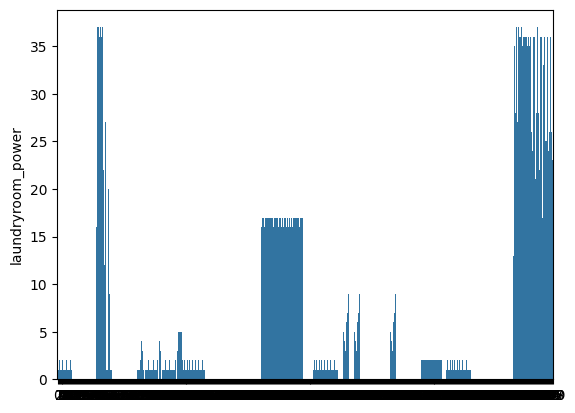

In [ ]:
sns.barplot(dataset['laundryroom_power'])
plt.show()

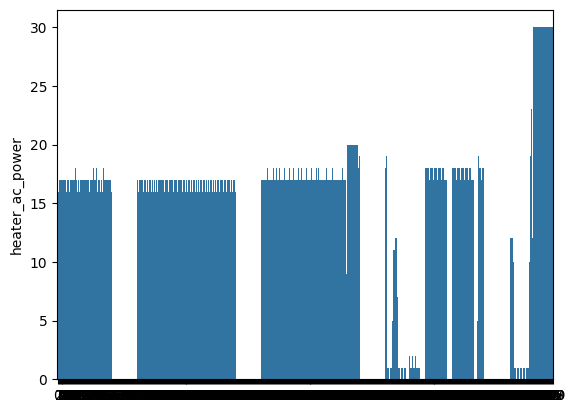

In [ ]:
sns.barplot(dataset['heater_ac_power'])
plt.show()

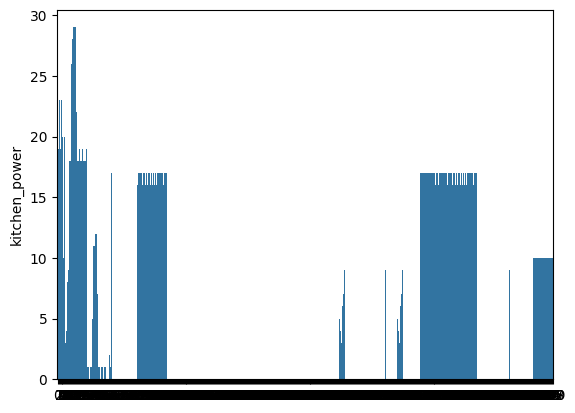

In [ ]:
sns.barplot(dataset['kitchen_power'])
plt.show()

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundryroom_power,heater_ac_power,Total_power_consumed
0,4.216,0.418,234.84,18.4,18,1,17,36
1,5.360,0.436,233.63,23.0,19,1,16,36
2,5.374,0.498,233.29,23.0,23,2,17,42
3,5.388,0.502,233.74,23.0,19,1,17,37
4,3.666,0.528,235.68,15.8,23,1,17,41


In [ ]:
#calculating bill at Rs6.29 per kWh
dataset['Bill']=dataset['Total_power_consumed']*6.29
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundryroom_power,heater_ac_power,Total_power_consumed,Bill
0,4.216,0.418,234.84,18.4,18,1,17,36,226.44
1,5.360,0.436,233.63,23.0,19,1,16,36,226.44
2,5.374,0.498,233.29,23.0,23,2,17,42,264.18
3,5.388,0.502,233.74,23.0,19,1,17,37,232.73
4,3.666,0.528,235.68,15.8,23,1,17,41,257.89


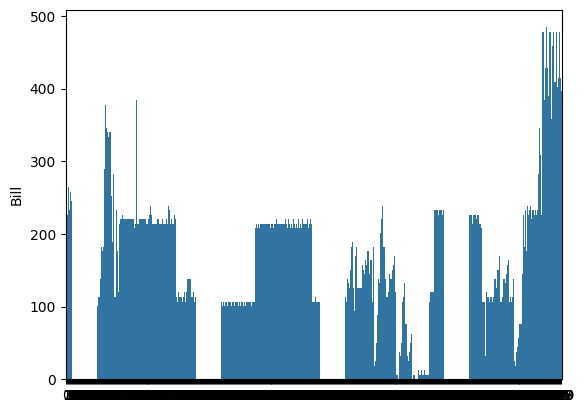

In [ ]:
sns.barplot(dataset['Bill'])
plt.show()

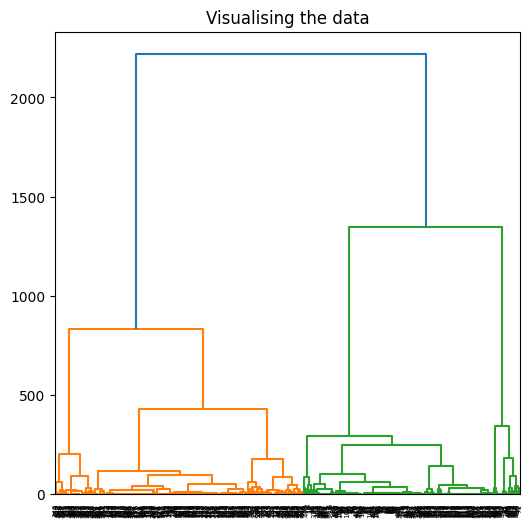

In [ ]:
X=dataset.drop(columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity'])
plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
import scipy.cluster.hierarchy as shc
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))



In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage = 'ward',n_clusters = 2).fit(X)

# print the class labels
print(clustering.labels_)

[0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
dataset.head(20)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundryroom_power,heater_ac_power,Total_power_consumed,Bill
0,4.216,0.418,234.84,18.4,18,1,17,36,226.44
1,5.360,0.436,233.63,23.0,19,1,16,36,226.44
2,5.374,0.498,233.29,23.0,23,2,17,42,264.18
3,5.388,0.502,233.74,23.0,19,1,17,37,232.73
4,3.666,0.528,235.68,15.8,23,1,17,41,257.89
5,3.520,0.522,235.02,15.0,20,2,17,39,245.31
6,3.702,0.520,235.09,15.8,10,1,17,28,176.12
7,3.700,0.520,235.22,15.8,20,1,17,38,239.02
8,3.668,0.510,233.99,15.8,3,1,17,21,132.09
9,3.662,0.510,233.86,15.8,4,2,16,22,138.38


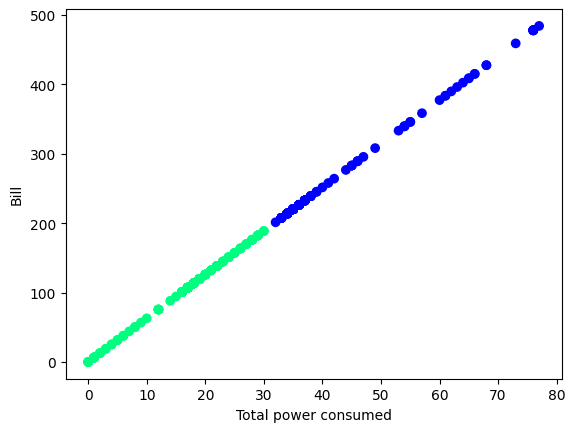

In [ ]:

plt.scatter(X['Total_power_consumed'], X['Bill'],c = clustering.labels_, cmap =plt.cm.winter)
plt.xlabel('Total power consumed')
plt.ylabel('Bill')
plt.show()

You are in cluster 2:your bill is comparitively okay


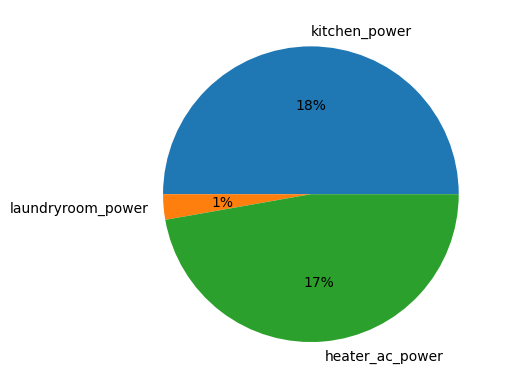

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

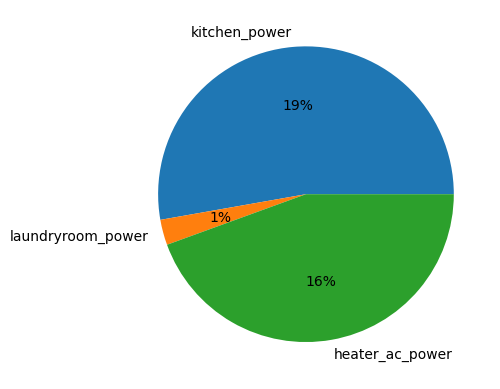

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

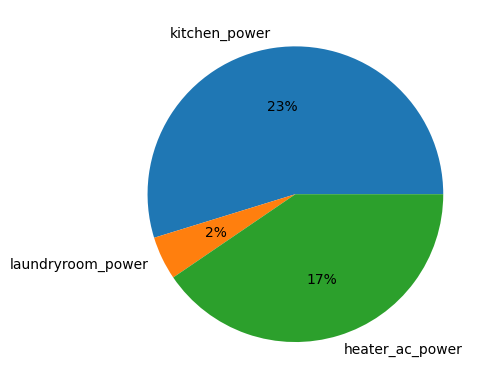

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

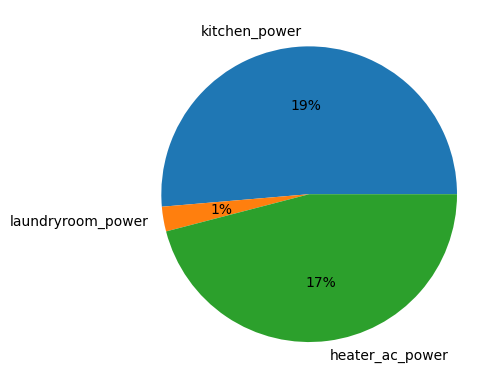

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

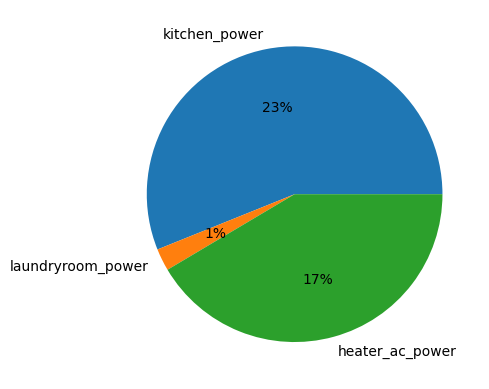

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

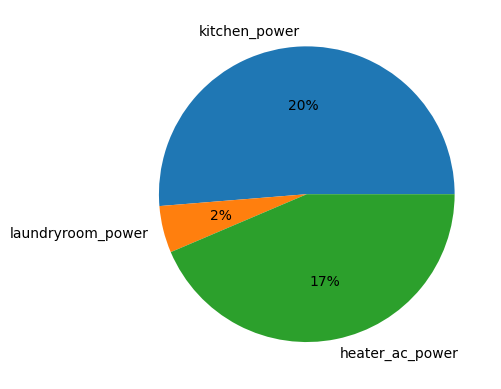

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

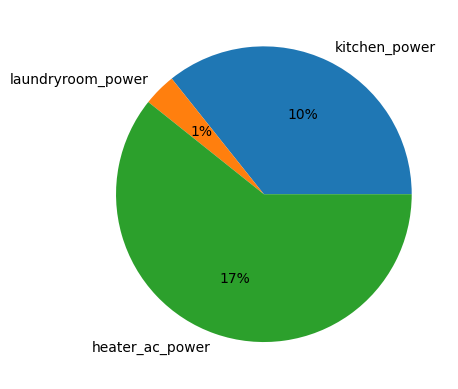

Since most of the power usage is due to kitchen appliances. Here are some tips:
Upgrade to Energy-Efficient Appliances: When replacing kitchen appliances, choose models with the ENERGY STAR label or other energy-efficient certifications. These appliances typically use less energy than their non-certified counterparts.

Use Energy-Efficient Cooking Methods: Opt for energy-efficient cooking methods such as using a microwave, slow cooker, or toaster oven instead of a conventional oven whenever possible.
Use lids on pots and pans to retain heat, reducing cooking time and energy consumption.

Properly Maintain Appliances: Keep appliances clean and well-maintained to ensure they operate efficiently. Regularly clean refrigerator coils, oven burners, and other components.
Check and replace worn-out seals on refrigerators and freezers to maintain proper temperature and improve energy efficiency.

Optimize Refrigerator and Freezer Usage: Keep the refrigerator and freezer settings at the recommen

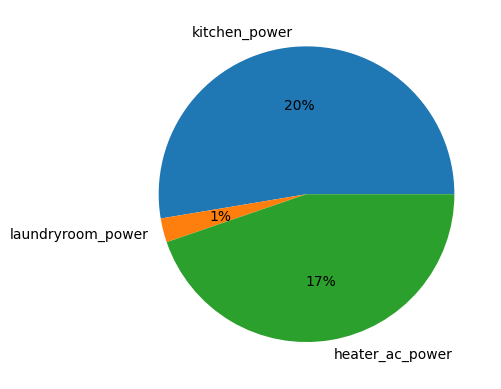

Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar 

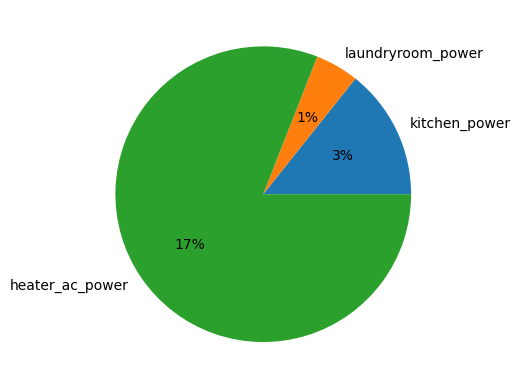

Since most of the power usage is due to kitchen appliances. Here are some tips:
Upgrade to Energy-Efficient Appliances: When replacing kitchen appliances, choose models with the ENERGY STAR label or other energy-efficient certifications. These appliances typically use less energy than their non-certified counterparts.

Use Energy-Efficient Cooking Methods: Opt for energy-efficient cooking methods such as using a microwave, slow cooker, or toaster oven instead of a conventional oven whenever possible.
Use lids on pots and pans to retain heat, reducing cooking time and energy consumption.

Properly Maintain Appliances: Keep appliances clean and well-maintained to ensure they operate efficiently. Regularly clean refrigerator coils, oven burners, and other components.
Check and replace worn-out seals on refrigerators and freezers to maintain proper temperature and improve energy efficiency.

Optimize Refrigerator and Freezer Usage: Keep the refrigerator and freezer settings at the recommen

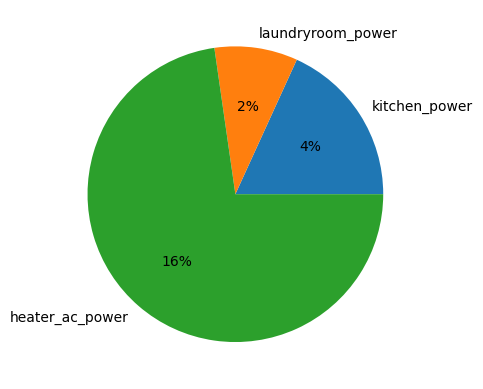

Since most of the power usage is due to kitchen appliances. Here are some tips:
Upgrade to Energy-Efficient Appliances: When replacing kitchen appliances, choose models with the ENERGY STAR label or other energy-efficient certifications. These appliances typically use less energy than their non-certified counterparts.

Use Energy-Efficient Cooking Methods: Opt for energy-efficient cooking methods such as using a microwave, slow cooker, or toaster oven instead of a conventional oven whenever possible.
Use lids on pots and pans to retain heat, reducing cooking time and energy consumption.

Properly Maintain Appliances: Keep appliances clean and well-maintained to ensure they operate efficiently. Regularly clean refrigerator coils, oven burners, and other components.
Check and replace worn-out seals on refrigerators and freezers to maintain proper temperature and improve energy efficiency.

Optimize Refrigerator and Freezer Usage: Keep the refrigerator and freezer settings at the recommen

In [ ]:
#0 is assigned to total power less than 30 and 1 to total power more than 30
one='''Since most of the power usage is due to AC and heater. Here are some tips:
Air Conditioning:

Use a Programmable Thermostat: Set your thermostat to higher temperatures in the summer and lower temperatures in the winter when you're away or asleep.
Regular Maintenance: Clean or replace air filters regularly to ensure optimal performance. Schedule professional maintenance to keep the system running efficiently.
Proper Insulation: Ensure your home is well-insulated to minimize heat transfer, reducing the workload on your AC.
Use Fans: Ceiling fans and floor fans can help distribute cooled air more efficiently, allowing you to set the thermostat a bit higher.
Seal Leaks: Seal gaps and cracks in windows and doors to prevent cold air from escaping in the summer and warm air in the winter.

Heating:

Programmable Thermostat: Set your thermostat to lower temperatures when you're away or sleeping.
Insulation: Insulate your home to reduce heat loss and keep the warmth inside.
Seal Leaks: Similar to cooling, seal gaps and cracks to prevent heat loss.
Layer Clothing: Dress in layers to stay warm, allowing you to keep the thermostat lower.
Use Space Heaters Wisely: Heat only the rooms you're using, and turn off space heaters when you leave.'''

two='''Since most of the power usage is due to laundry room appliances. Here are some tips:

Cold Water Wash: Wash clothes in cold water whenever possible, as heating water consumes a significant amount of energy.
Full Loads: Wait until you have a full load before running the washing machine. This maximizes energy efficiency.
High-Efficiency Appliances: Invest in energy-efficient washing machines that use less water and electricity.
Air Dry: Instead of using the dryer, air-dry your clothes on a clothesline or drying rack.
Regular Maintenance: Keep the washing machine clean and well-maintained to ensure optimal performance.'''

three='''Since most of the power usage is due to kitchen appliances. Here are some tips:
Upgrade to Energy-Efficient Appliances: When replacing kitchen appliances, choose models with the ENERGY STAR label or other energy-efficient certifications. These appliances typically use less energy than their non-certified counterparts.

Use Energy-Efficient Cooking Methods: Opt for energy-efficient cooking methods such as using a microwave, slow cooker, or toaster oven instead of a conventional oven whenever possible.
Use lids on pots and pans to retain heat, reducing cooking time and energy consumption.

Properly Maintain Appliances: Keep appliances clean and well-maintained to ensure they operate efficiently. Regularly clean refrigerator coils, oven burners, and other components.
Check and replace worn-out seals on refrigerators and freezers to maintain proper temperature and improve energy efficiency.

Optimize Refrigerator and Freezer Usage: Keep the refrigerator and freezer settings at the recommended temperatures.
Avoid overloading the fridge or freezer, as it can reduce air circulation and force the appliances to work harder.

Unplug Appliances When Not in Use: Unplug small kitchen appliances like toasters, coffee makers, and blenders when they are not in use. Many appliances consume energy even when turned off but still plugged in (known as standby power).

Use Energy-Efficient Lighting: Replace incandescent bulbs with energy-efficient LED or CFL bulbs in your kitchen. These alternatives use less electricity and last longer.

Batch Cooking: Cook in larger batches to reduce the number of times you need to use the oven or stove throughout the week. Reheat leftovers using a microwave or toaster oven.

Conserve Water While Cooking: When boiling water, use just enough water to cover the food, and use a lid to bring water to a boil more quickly.
Consider using a pressure cooker or steamer, which can cook food faster and use less energy.

Smart Cooking Practices: Thaw frozen food before cooking to reduce cooking time.
Match pot and pan sizes to the burner to maximize efficiency.
Turn off the oven a few minutes before cooking time is complete, as residual heat will continue to cook the food.

Invest in Smart Appliances: Smart appliances often come with features that allow you to monitor and control energy usage. Utilize these features to optimize energy efficiency.'''
sol=[one,two,three]
for i in range (10):
  if clustering.labels_[i]==1:
    print('You are in cluster 1:your bill is comparitively higher')
  else: print('You are in cluster 2:your bill is comparitively okay')
  y=X.iloc[i,0:3]
  total=sum(y)
  plt.pie(y,labels=['kitchen_power','laundryroom_power','heater_ac_power'],autopct=lambda p: '{:.0f}%'.format(p*total/100))
  plt.show()
  m=max(y)
  for j in range(0,3,1):
    if y[j]==m:
      print(sol[j])


